In [35]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# add project root to path
import os
import sys


# Get the absolute path of the root directory of your package
ROOT = os.path.abspath(os.path.dirname("../../"))
print(ROOT)
# Append the root directory to the system path
sys.path.append(ROOT)


/mnt/external/projects/spotlite


In [36]:
# Loading features
import pandas as pd

spot_data = pd.read_csv(f"{ROOT}/dataset/sentinel_data_4classes_2024.csv")
print(spot_data.head())

X = spot_data.drop('label', axis=1)
Y = spot_data['label']

print(X.shape)

      red   green    blue     nir      ndvi  label
0  2052.0  1890.0  1716.0  1716.0  0.175241    0.0
1  1825.0  1803.0  1680.0  1680.0  0.268390    0.0
2  1916.0  1910.0  1673.0  1673.0  0.239381    0.0
3  1866.0  1727.0  1670.0  1670.0  0.240537    0.0
4  1834.0  1886.0  1623.0  1623.0  0.324742    0.0
(2913, 5)


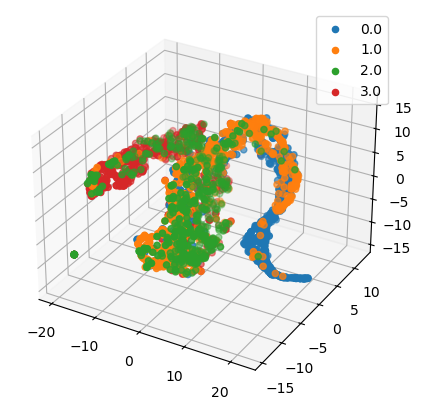

In [37]:
# Assuming X is your data and y are your labels

from mpl_toolkits.mplot3d import Axes3D

# Assuming X is your data and Y are your labels
X_tsne = TSNE(n_components=3, random_state=42).fit_transform(X)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(set(Y)):
    ax.scatter(X_tsne[Y == label, 0], X_tsne[Y == label, 1], X_tsne[Y == label, 2], label=label)

plt.legend()
plt.show()

In [38]:
!pip install --upgrade nbformat

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [39]:

import plotly.express as px
from sklearn.manifold import TSNE

# Assuming X is your data and Y are your labels
X_tsne = TSNE(n_components=3, random_state=42).fit_transform(X)

df = pd.DataFrame(X_tsne, columns=['component1', 'component2', 'component3'])
df['label'] = Y

fig = px.scatter_3d(df, x='component1', y='component2', z='component3', color='label')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed